In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [6]:
def set_apa_style():
    plt.style.use('fivethirtyeight')
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.titlesize'] = 18
    plt.rcParams['lines.linewidth'] = 2
def design_fir_filter(numtaps, cutoff, fs):
    return signal.firwin(numtaps, cutoff, window='hamming', pass_zero='lowpass', fs=fs)

def plot_filter_characteristics(b, fs):
    set_apa_style()
    w, h = signal.freqz(b, worN=8000)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    
    # Frequency response
    ax1.plot(0.5*fs*w/np.pi, np.abs(h), color='black')
    ax1.set_title('Frequency Response')
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Gain')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Impulse response
    ax2.stem(range(len(b)), b, linefmt='black', markerfmt='ko', basefmt='k-')
    ax2.set_title('Impulse Response')
    ax2.set_xlabel('Samples')
    ax2.set_ylabel('Amplitude')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

def plot_results(time, original_data, filtered_data):
    set_apa_style()
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(time, original_data, label='Original', color='black', linestyle='-')
    ax.plot(time, filtered_data, label='Filtered', color='gray', linestyle='--')
    ax.set_title('Original vs Filtered Time Series')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def generate_step_function(length, step_point):
    return np.concatenate([np.zeros(step_point), np.ones(length - step_point)])

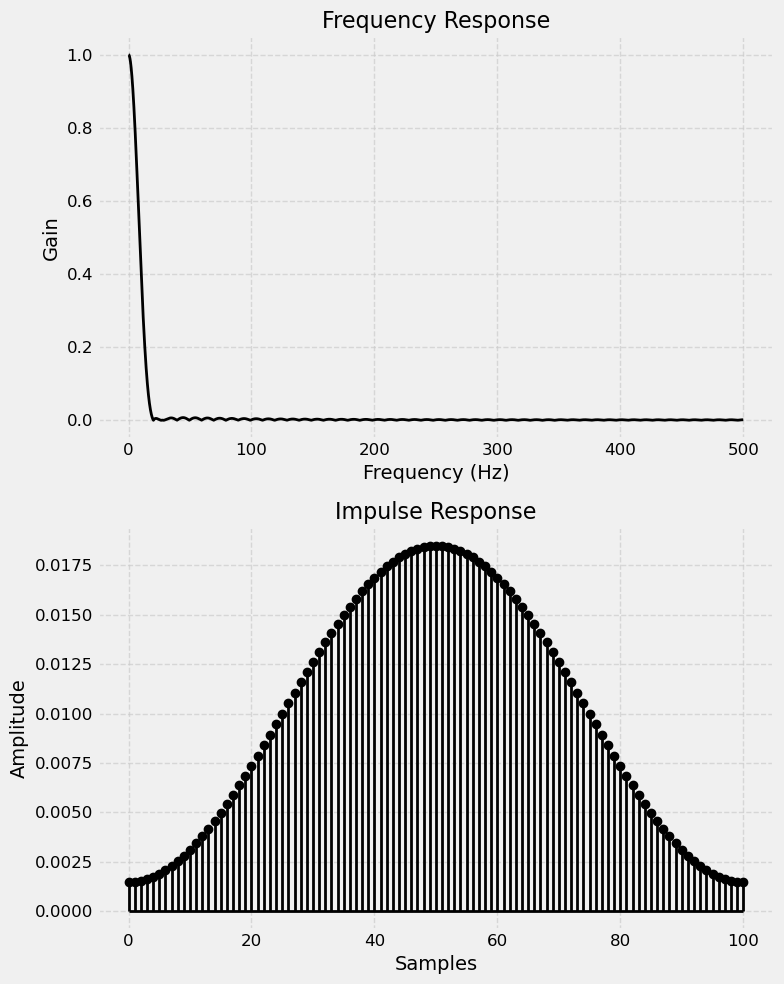

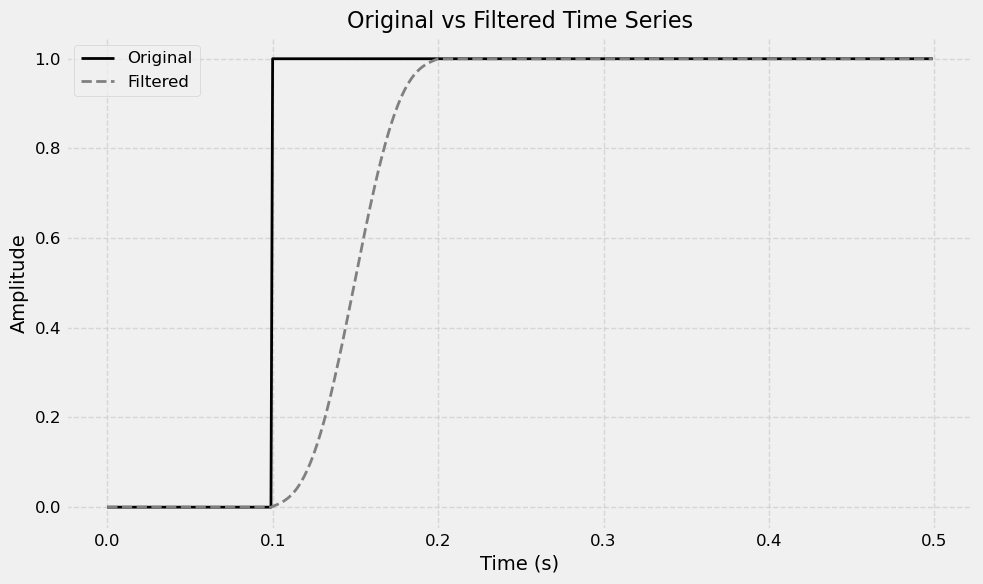

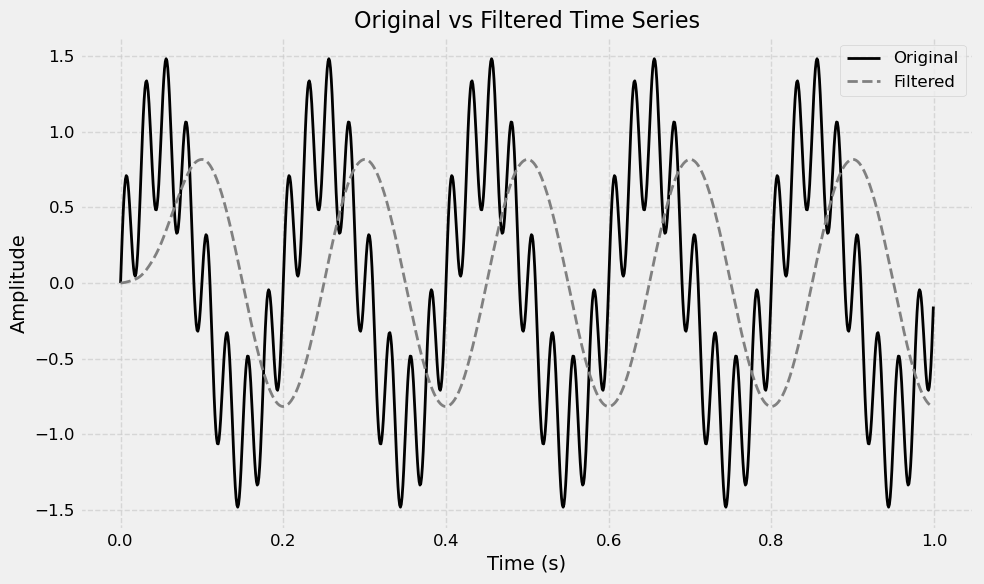

In [7]:
if __name__ == "__main__":
    # Filter parameters
    numtaps = 101  # High order filter to emphasize ringing
    cutoff = 0.1  # Normalized frequency (1.0 = Nyquist frequency)
    fs = 1000  # Hz

    # Design filter
    b = design_fir_filter(numtaps, cutoff, fs)

    # Plot filter characteristics
    plot_filter_characteristics(b, fs)

    # Generate step function
    t = np.arange(500) / fs
    step_data = generate_step_function(500, 100)

    # Apply filter
    filtered_step = signal.lfilter(b, [1.0], step_data)

    # Plot results
    plot_results(t, step_data, filtered_step)

    # Generate and filter a signal with mixed frequencies
    t_mix = np.arange(1000) / fs
    mixed_signal = np.sin(2*np.pi*5*t_mix) + 0.5*np.sin(2*np.pi*40*t_mix)
    filtered_mix = signal.lfilter(b, [1.0], mixed_signal)

    # Plot mixed signal results
    plot_results(t_mix, mixed_signal, filtered_mix)

In [ ]:
plt.style.available

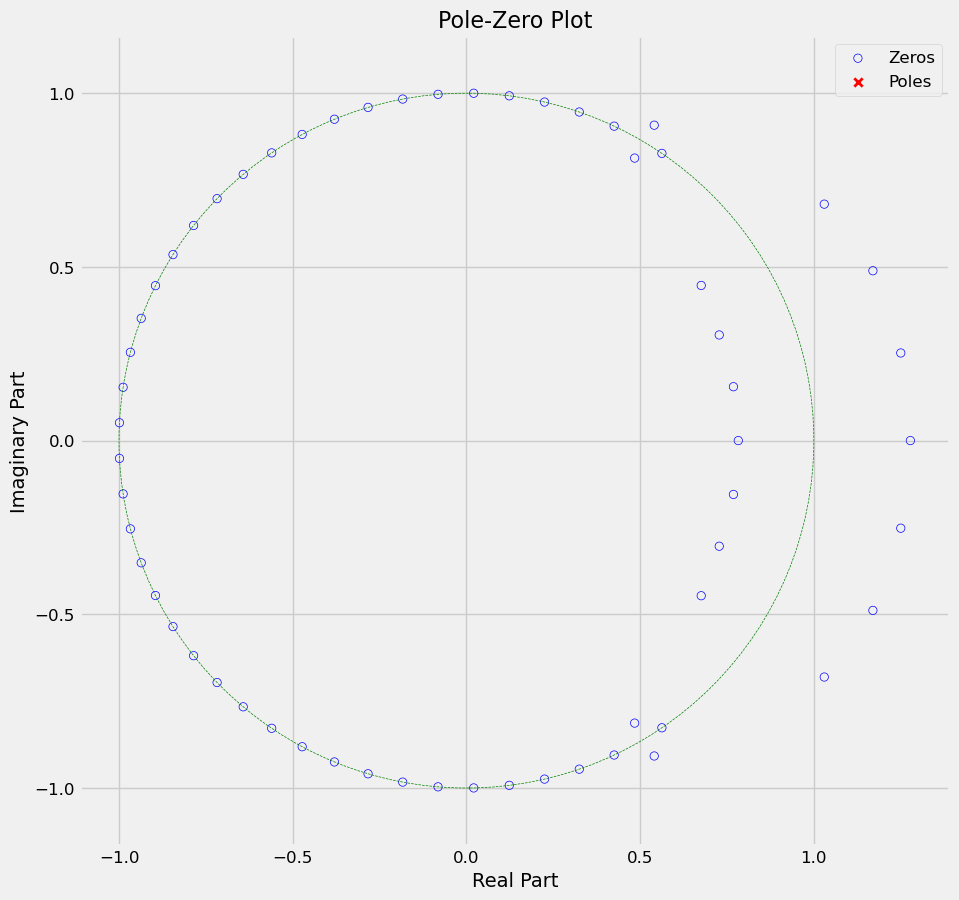

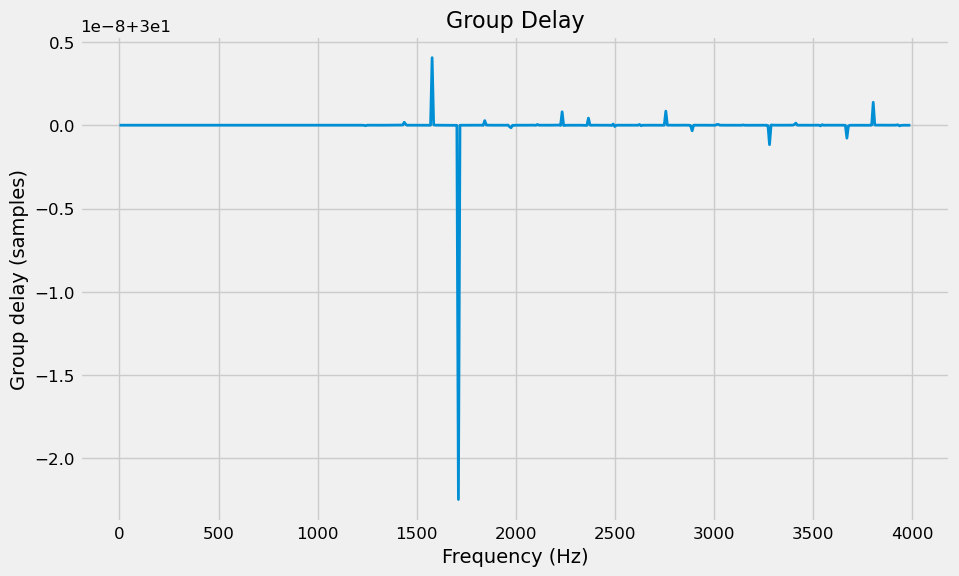

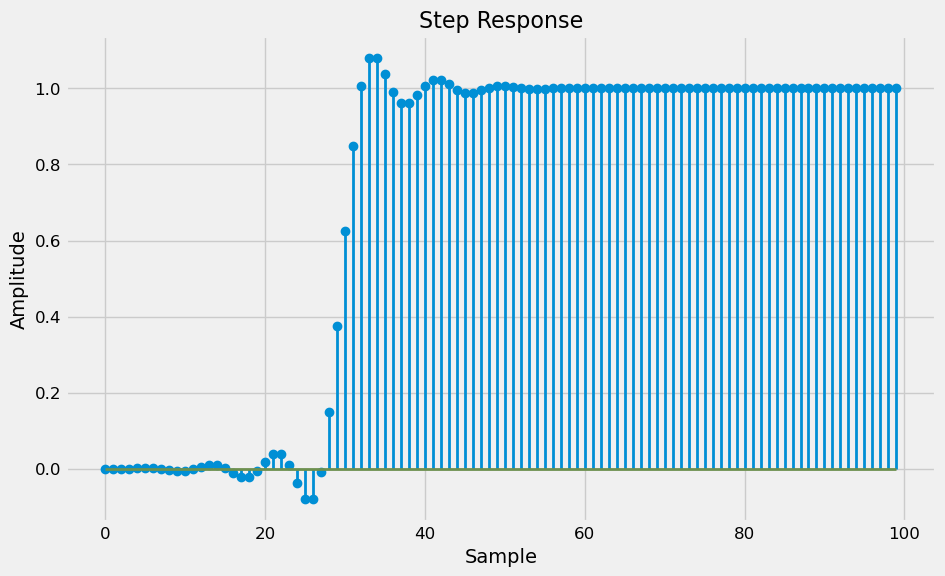

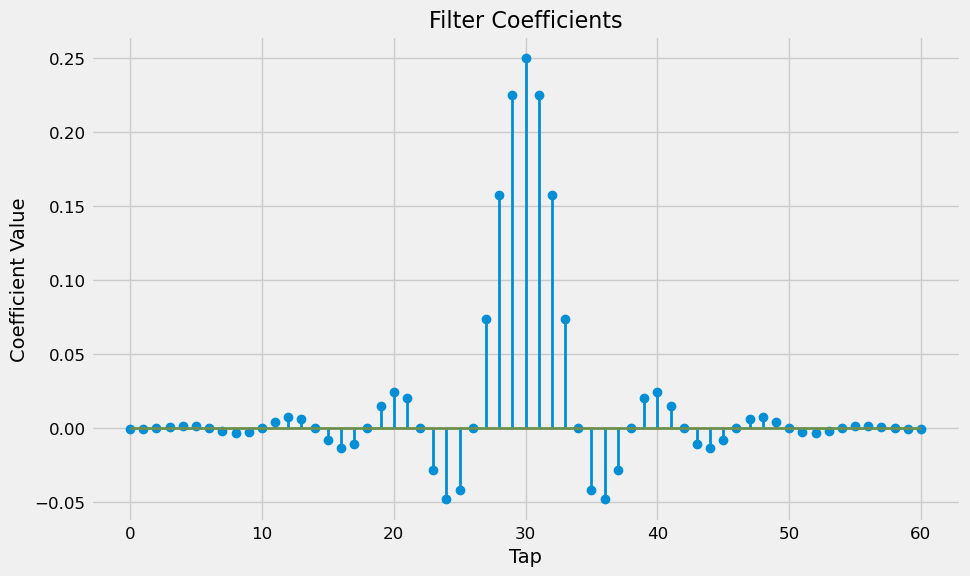

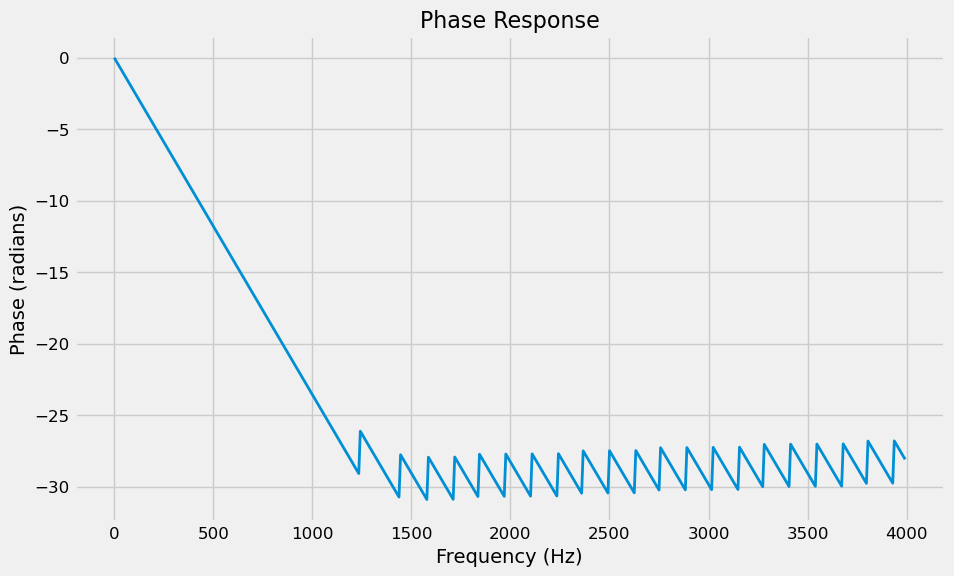

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define a sample FIR filter
def create_lowpass_fir(numtaps, cutoff, fs):
    return signal.firwin(numtaps, cutoff, fs=fs)

# Parameters
numtaps = 61
cutoff = 1000  # Hz
fs = 8000  # Hz

# Create the FIR filter
fir_coeff = create_lowpass_fir(numtaps, cutoff, fs)

# 1. Pole-Zero Plot
def plot_pole_zero(b):
    z, p, k = signal.tf2zpk(b, 1)
    plt.figure(figsize=(10, 10))
    plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b', facecolors='none', label='Zeros')
    plt.scatter(np.real(p), np.imag(p), marker='x', color='r', label='Poles')
    circle = plt.Circle((0, 0), 1, fill=False, color='g', linestyle='--')
    plt.gca().add_artist(circle)
    plt.axis('equal')
    plt.title('Pole-Zero Plot')
    plt.xlabel('Real Part')
    plt.ylabel('Imaginary Part')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_pole_zero(fir_coeff)

# 2. Group Delay
def plot_group_delay(b, fs):
    w, gd = signal.group_delay((b, 1))
    plt.figure(figsize=(10, 6))
    plt.plot(w * fs / (2 * np.pi), gd)
    plt.title('Group Delay')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Group delay (samples)')
    plt.grid(True)
    plt.show()

plot_group_delay(fir_coeff, fs)

# 3. Step Response
def plot_step_response(b):
    n = 100
    step = np.ones(n)
    step_response = signal.lfilter(b, 1, step)
    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(n), step_response)
    plt.title('Step Response')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

plot_step_response(fir_coeff)

# 4. Filter Coefficient Visualization
def plot_filter_coefficients(b):
    plt.figure(figsize=(10, 6))
    plt.stem(np.arange(len(b)), b)
    plt.title('Filter Coefficients')
    plt.xlabel('Tap')
    plt.ylabel('Coefficient Value')
    plt.grid(True)
    plt.show()

plot_filter_coefficients(fir_coeff)

# 5. Phase Response
def plot_phase_response(b, fs):
    w, h = signal.freqz(b)
    plt.figure(figsize=(10, 6))
    plt.plot(w * fs / (2 * np.pi), np.unwrap(np.angle(h)))
    plt.title('Phase Response')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Phase (radians)')
    plt.grid(True)
    plt.show()

plot_phase_response(fir_coeff, fs)

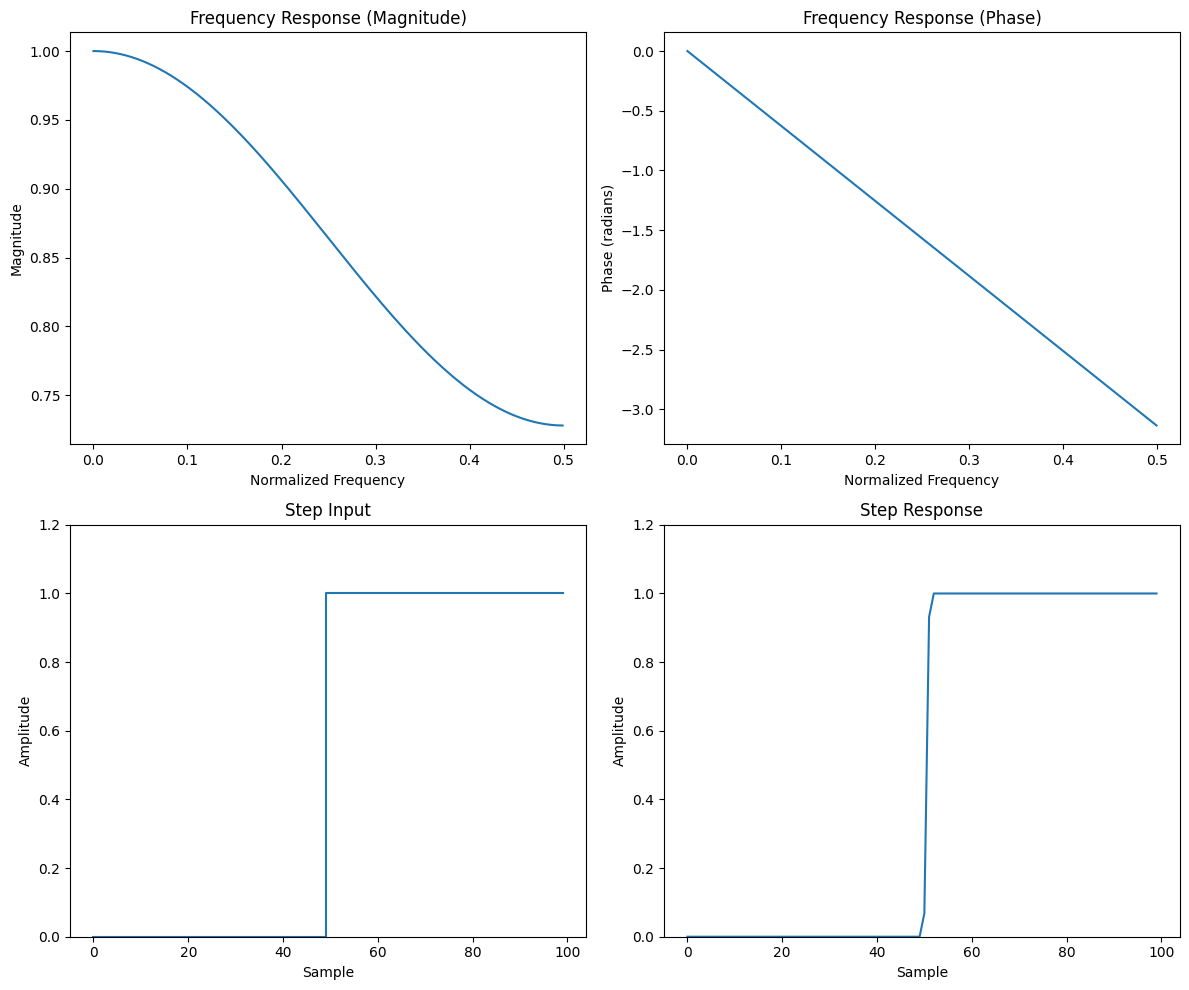

FIR Filter Coefficients:
[0.06799017 0.86401967 0.06799017]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define filter parameters
n = 3  # Filter order
fc = 0.1  # Cutoff frequency (normalized)

# Design FIR low-pass filter
fir_coeff = signal.firwin(n, fc, window='hamming')
np.array([1./3, 1./3, 1./3])

# Calculate frequency response
w, h = signal.freqz(fir_coeff)
freq = w / (2 * np.pi)  # Normalize frequency

# Calculate step response
t = np.arange(100)
step_input = np.zeros(100)
step_input[50:] = 1
step_response = signal.lfilter(fir_coeff, 1, step_input)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot frequency response (magnitude)
axs[0, 0].plot(freq, np.abs(h))
axs[0, 0].set_xlabel('Normalized Frequency')
axs[0, 0].set_ylabel('Magnitude')
axs[0, 0].set_title('Frequency Response (Magnitude)')

# Plot frequency response (phase)
axs[0, 1].plot(freq, np.unwrap(np.angle(h)))
axs[0, 1].set_xlabel('Normalized Frequency')
axs[0, 1].set_ylabel('Phase (radians)')
axs[0, 1].set_title('Frequency Response (Phase)')

# Plot step input
axs[1, 0].step(t, step_input)
axs[1, 0].set_xlabel('Sample')
axs[1, 0].set_ylabel('Amplitude')
axs[1, 0].set_title('Step Input')
axs[1, 0].set_ylim(0, 1.2)

# Plot step response
axs[1, 1].plot(t, step_response)
axs[1, 1].set_xlabel('Sample')
axs[1, 1].set_ylabel('Amplitude')
axs[1, 1].set_title('Step Response')
axs[1, 1].set_ylim(0, 1.2)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print filter coefficients
print("FIR Filter Coefficients:")
print(fir_coeff)

In [16]:
fir_coeff

array([0.06799017, 0.86401967, 0.06799017])

In [17]:
np.array([1./3, 1./3, 1./3])

array([0.33333333, 0.33333333, 0.33333333])

In [3]:
freq

array([0.        , 0.00097656, 0.00195312, 0.00292969, 0.00390625,
       0.00488281, 0.00585938, 0.00683594, 0.0078125 , 0.00878906,
       0.00976562, 0.01074219, 0.01171875, 0.01269531, 0.01367188,
       0.01464844, 0.015625  , 0.01660156, 0.01757812, 0.01855469,
       0.01953125, 0.02050781, 0.02148437, 0.02246094, 0.0234375 ,
       0.02441406, 0.02539063, 0.02636719, 0.02734375, 0.02832031,
       0.02929687, 0.03027344, 0.03125   , 0.03222656, 0.03320312,
       0.03417969, 0.03515625, 0.03613281, 0.03710938, 0.03808594,
       0.0390625 , 0.04003906, 0.04101562, 0.04199219, 0.04296875,
       0.04394531, 0.04492188, 0.04589844, 0.046875  , 0.04785156,
       0.04882812, 0.04980469, 0.05078125, 0.05175781, 0.05273438,
       0.05371094, 0.0546875 , 0.05566406, 0.05664062, 0.05761719,
       0.05859375, 0.05957031, 0.06054688, 0.06152344, 0.0625    ,
       0.06347656, 0.06445312, 0.06542969, 0.06640625, 0.06738281,
       0.06835938, 0.06933594, 0.0703125 , 0.07128906, 0.07226

In [1]:
from pylab import *
import scipy.signal as signal

#Plot frequency and phase response
def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))
    subplot(211)
    plot(w/max(w),h_dB)
    ylim(-150, 5)
    ylabel('Magnitude (db)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Frequency response')
    subplot(212)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/max(w),h_Phase)
    ylabel('Phase (radians)')
    xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
    title(r'Phase response')
    subplots_adjust(hspace=0.5)

#Plot step and impulse response
def impz(b,a=1):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = signal.lfilter(b,a,impulse)
    subplot(211)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')
    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Step response')
    subplots_adjust(hspace=0.5)

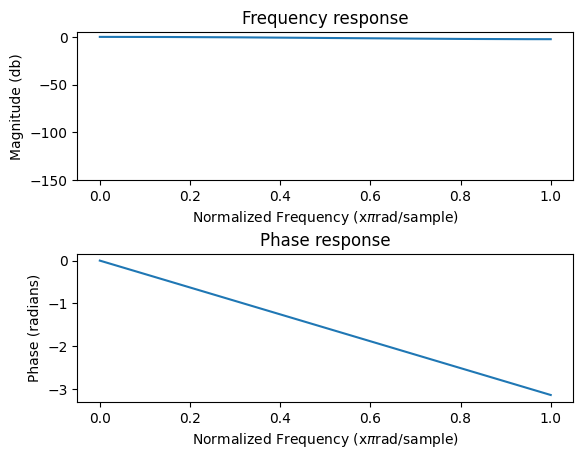

In [5]:
n = 3
a = signal.firwin(n, cutoff = 0.3, window = "hamming")
#Frequency and phase response
mfreqz(a)

In [6]:
show()
#Impulse and step response
figure(2)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

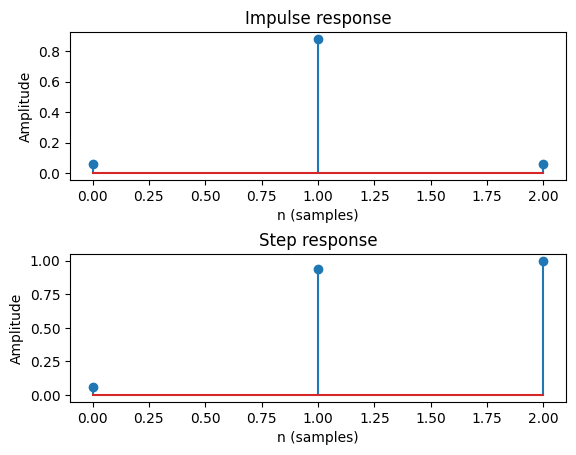

In [7]:
impz(a)

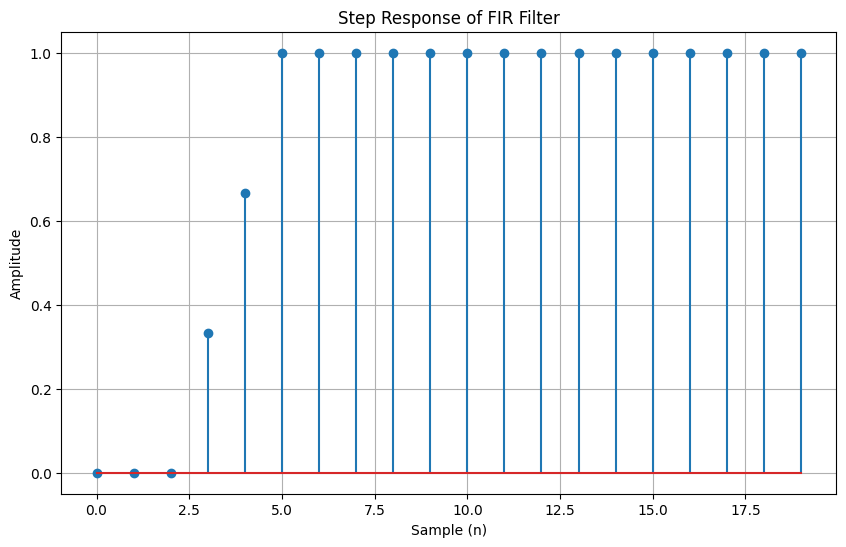

Step response values:
y[0] = 0.0000
y[1] = 0.0000
y[2] = 0.0000
y[3] = 0.3333
y[4] = 0.6667
y[5] = 1.0000
y[6] = 1.0000
y[7] = 1.0000
y[8] = 1.0000
y[9] = 1.0000
y[10] = 1.0000
y[11] = 1.0000
y[12] = 1.0000
y[13] = 1.0000
y[14] = 1.0000
y[15] = 1.0000
y[16] = 1.0000
y[17] = 1.0000
y[18] = 1.0000
y[19] = 1.0000


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the FIR filter coefficients
b = np.array([1/3, 1/3, 1/3])

# Create the input signal (step function)
n = np.arange(0, 20)  # Time steps
x = np.ones(len(n))   # Step input (all ones)
x[:3] = 0             # First 3 samples are 0

# Calculate the step response
y = np.convolve(x, b, mode='full')[:len(n)]

# Create the plot
plt.figure(figsize=(10, 6))
plt.stem(n, y)
plt.title('Step Response of FIR Filter')
plt.xlabel('Sample (n)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Print the step response values
print("Step response values:")
for i, val in enumerate(y):
    print(f"y[{i}] = {val:.4f}")

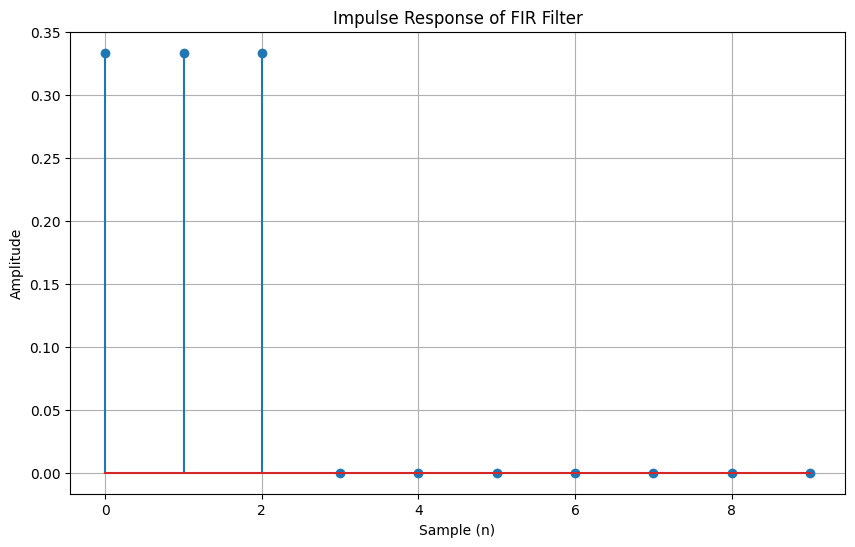

Impulse response values:
y[0] = 0.3333
y[1] = 0.3333
y[2] = 0.3333
y[3] = 0.0000
y[4] = 0.0000
y[5] = 0.0000
y[6] = 0.0000
y[7] = 0.0000
y[8] = 0.0000
y[9] = 0.0000


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the FIR filter coefficients
b = np.array([1/3, 1/3, 1/3])

# Create the input signal (impulse function)
n = np.arange(0, 10)  # Time steps
x = np.zeros(len(n))  # All zeros
x[0] = 1              # First sample is 1 (impulse)

# Calculate the impulse response
y = np.convolve(x, b, mode='full')[:len(n)]

# Create the plot
plt.figure(figsize=(10, 6))
plt.stem(n, y)
plt.title('Impulse Response of FIR Filter')
plt.xlabel('Sample (n)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Print the impulse response values
print("Impulse response values:")
for i, val in enumerate(y):
    print(f"y[{i}] = {val:.4f}")

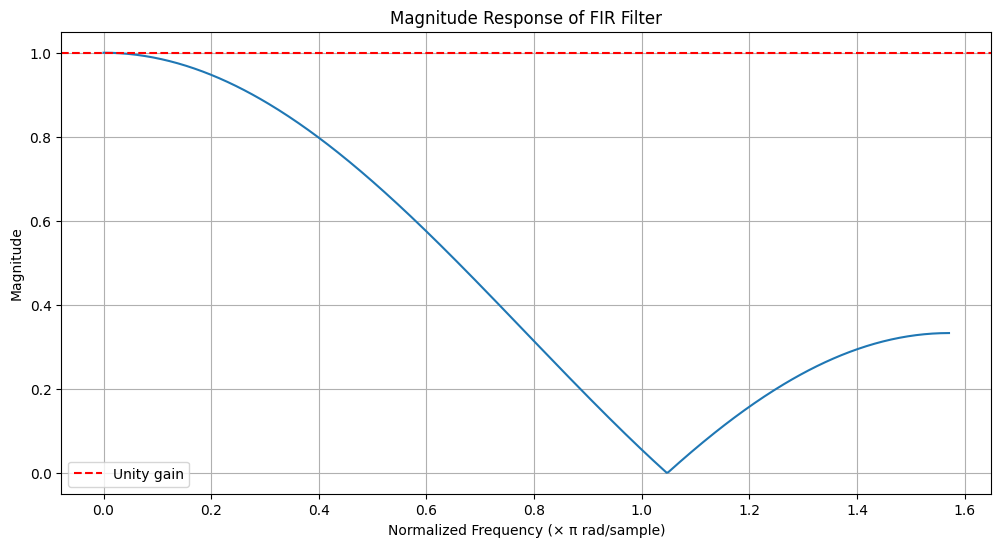

Maximum magnitude: 1.0000
Frequency at maximum magnitude: 0.0000 × π rad/sample


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the FIR filter coefficients
b = np.array([1/3, 1/3, 1/3])
# b = np.array([0.0606, 0.0675, 0.0731, 0.0773, 0.0798, 0.0807, 0.0798, 0.0773, 0.0731, 0.0675, 0.0606])

# Calculate the frequency response
w, h = np.fft.rfftfreq(1024, d=1), np.fft.rfft(b, n=1024)
magnitude = np.abs(h)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(w * np.pi, magnitude)
plt.title('Magnitude Response of FIR Filter')
plt.xlabel('Normalized Frequency (× π rad/sample)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.axhline(y=1, color='r', linestyle='--', label='Unity gain')
plt.legend()
plt.show()

# Find the maximum magnitude
max_magnitude = np.max(magnitude)
max_freq = w[np.argmax(magnitude)] * np.pi

print(f"Maximum magnitude: {max_magnitude:.4f}")
print(f"Frequency at maximum magnitude: {max_freq:.4f} × π rad/sample")

In general, if the sum of the absolute values of the filter coefficients is greater than 1, there will be some frequencies where the magnitude response is greater than 1, potentially increasing the power in those frequency bands.

To nawet nie musi być tak, że któraś z mocy będzie zwiększona, wystarczy, że zmniejszy sie je w nieproporcjonalny sposób. Tzn. że jakąs zmniejszy się mniej niż inną. 

OKay, zrobiłęm filter n=3 udający moving avg i on nagle robi że sygnał jest istotny. Nie mówie natomiast na jakim paśmie, a to chyba wynika z tej analizy tomaszowej. Jakby zrobić dodatkową analizę tomaszową pokazująca na jakiej F mamy sprzężenie to mógłbym pokazać ten wykres powyżej, co on robi z mocą i wyjaśnić, że widocznie spadek mocy był akurat taki, że zanotowano istotną statystyznie różnice. 